### Heuristic Models
Look at the Seattle weather in the **data** folder. Come up with a heuristic model to predict if it will rain today. Keep in mind this is a time series, which means that you only know what happened historically (before a given date). One example of a heuristic model is: It will rain tomorrow if it rained more than 1 inch (>1.0 PRCP) today. Describe your heuristic model in the next cell.

**your model here**  

Examples:  

If rained yesterday it will rain today.  
If it rained yesterday or the day before it will rain today.

In [202]:
#here is an example of how to build and populate a hurestic model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
# Load Data
df = pd.read_csv('seattle_weather_1948-2017.csv')

In [250]:
df['DATE']= pd.to_datetime(df['DATE'])
df.head(1)

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,month
0,1948-01-01,0.47,51,42,True,True,0.0,1.0,0.0,0.0,1


In [251]:
# Find nulls in PRCP column
df[df['PRCP'].isnull()]

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,month


In [252]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,month
0,1948-01-01,0.47,51,42,True,True,0.0,1.0,0.0,0.0,1
1,1948-01-02,0.59,45,36,True,True,0.0,1.0,0.0,0.0,1
2,1948-01-03,0.42,45,35,True,True,0.0,1.0,0.0,0.0,1
3,1948-01-04,0.31,45,34,True,True,0.0,1.0,0.0,0.0,1
4,1948-01-05,0.17,45,32,True,True,0.0,1.0,0.0,0.0,1


In [253]:
# Find nulls in RAIN column

In [254]:
df['RAIN'].value_counts()

False    14651
True     10900
Name: RAIN, dtype: int64

In [255]:
df['RAIN'].value_counts()

False    14651
True     10900
Name: RAIN, dtype: int64

<AxesSubplot:xlabel='RAIN', ylabel='count'>

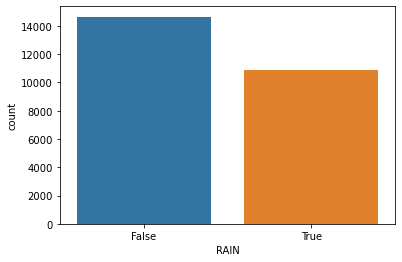

In [256]:
sns.countplot(data=df, x='RAIN')

# Look at our target class distribution
df['RAIN'].plot(kind='bar')

### Create functions to handle NaN values

In [257]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,month
0,1948-01-01,0.47,51,42,True,True,0.0,1.0,0.0,0.0,1
1,1948-01-02,0.59,45,36,True,True,0.0,1.0,0.0,0.0,1
2,1948-01-03,0.42,45,35,True,True,0.0,1.0,0.0,0.0,1
3,1948-01-04,0.31,45,34,True,True,0.0,1.0,0.0,0.0,1
4,1948-01-05,0.17,45,32,True,True,0.0,1.0,0.0,0.0,1


In [258]:
df[df['PRCP'].isnull()]

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,month


(array([2.4026e+04, 1.1750e+03, 2.4700e+02, 7.1000e+01, 1.6000e+01,
        1.0000e+01, 4.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.   , 0.502, 1.004, 1.506, 2.008, 2.51 , 3.012, 3.514, 4.016,
        4.518, 5.02 ]),
 <BarContainer object of 10 artists>)

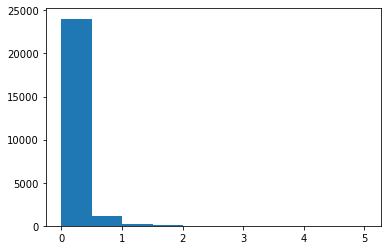

In [259]:
plt.hist(df['PRCP'])

In [260]:
df['PRCP'].describe()

count    25551.000000
mean         0.106209
std          0.239020
min          0.000000
25%          0.000000
50%          0.000000
75%          0.100000
max          5.020000
Name: PRCP, dtype: float64

In [261]:
# Check for NaN values
df['RAIN'].fillna(False, inplace=True)
df['PRCP'].fillna(df['PRCP'].median(), inplace=True)

In [262]:
df[df['PRCP'].isnull()]

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,month


## EDA

Text(0.5, 0, 'Minimum Temperature in F')

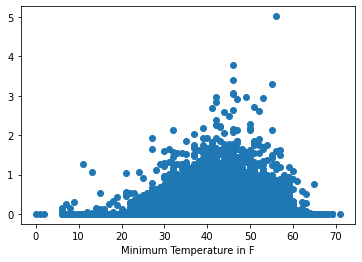

In [263]:
plt.scatter(x ='TMIN', y='PRCP', data =df)
plt.xlabel("Minimum Temperature in F")

Text(0.5, 0, 'Minimum Temperature in F')

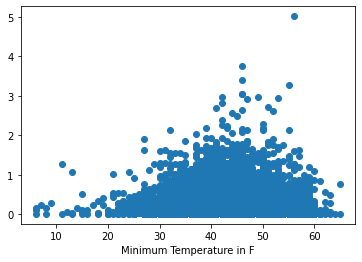

In [264]:
plt.scatter(x ='TMIN', y='PRCP', data =df1)
plt.xlabel("Minimum Temperature in F")

Text(0.5, 0, 'Maximum Temperature in F')

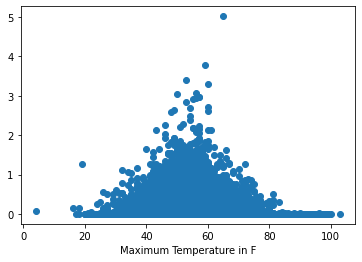

In [265]:
plt.scatter(x ='TMAX', y='PRCP', data =df)
plt.xlabel("Maximum Temperature in F")

In [287]:
# sns.pairplot(data=df)

<AxesSubplot:>

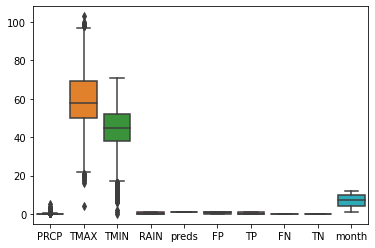

In [267]:
sns.boxplot(data=df)

## Identifying Outliers

In [268]:
# First quartile (Q1)


In [269]:
# Third quartile (Q3)


In [270]:
# Interquaritle range (IQR)


In [271]:
#Dropping the outliers from TMAX columns i.e. the value more than 100


### Coding a Heuristic by hand and evaluating

- If it rained yesterday or the today  then it will rain tomorrow

In [272]:
# Reset index and drop index column

In [273]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,month
0,1948-01-01,0.47,51,42,True,True,0.0,1.0,0.0,0.0,1
1,1948-01-02,0.59,45,36,True,True,0.0,1.0,0.0,0.0,1
2,1948-01-03,0.42,45,35,True,True,0.0,1.0,0.0,0.0,1
3,1948-01-04,0.31,45,34,True,True,0.0,1.0,0.0,0.0,1
4,1948-01-05,0.17,45,32,True,True,0.0,1.0,0.0,0.0,1


Text(0.5, 0, 'Maximum Temperature in F')

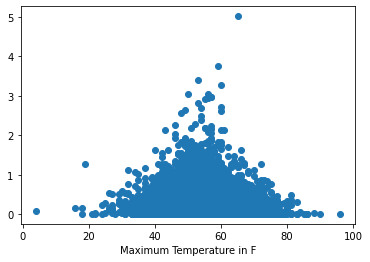

In [330]:
plt.scatter(x ='TMAX', y='PRCP', data =df1)
plt.xlabel("Maximum Temperature in F")

In [325]:
# Create function to perform our heuristic
def heuristic(df):
    preds = []
    months = [1,2,3,11,12]
    for x in range(len(df)):
        if x<2:
            preds.append(False)
        else:
            if (df.iloc[x-1]['RAIN']==True) | (df.iloc[x-2]['RAIN']==True) & (df.iloc[x]['DATE'].month in months):
                preds.append(True)
            else:
                preds.append(False)

    return preds

In [326]:
# Apply Heuristic
df['preds'] = heuristic(df)
#df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,month
0,1948-01-01,0.47,51,42,True,False,0.0,0.0,1.0,0.0,1
1,1948-01-02,0.59,45,36,True,False,0.0,0.0,1.0,0.0,1
2,1948-01-03,0.42,45,35,True,True,0.0,1.0,0.0,0.0,1
3,1948-01-04,0.31,45,34,True,True,0.0,1.0,0.0,0.0,1
4,1948-01-05,0.17,45,32,True,True,0.0,1.0,0.0,0.0,1


In [327]:
# Determine Accuracy

# Create function to to find values

def calc_confuse(df):
    
    "Calculate all possible results of a confusion matrix"

    # Hold all possible values and set to zero
    FP = np.zeros(len(df))
    TP = np.zeros(len(df))
    FN = np.zeros(len(df))
    TN = np.zeros(len(df))
    
    for x in range(len(df)):
        if (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == True):
            TP[x] = 1

        elif (df["RAIN"].iloc[x] == False) & (df["preds"].iloc[x] == False):
            TN[x] = 1

        elif (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == False):
            FN[x] = 1
        else:
            FP[x] = 1
    
    return FP, TP, FN, TN

In [328]:
# Extract results and create columns for each
w,x,y,z = calc_confuse(df)

df['FP']=w
df['TP']= x
df['FN'] = y
df['TN'] = z
# Look at 10 random rows to determin accuracy
df.sample(10)

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,month
8785,1972-01-20,1.66,53,48,True,True,0.0,1.0,0.0,0.0,1
25472,2017-09-27,0.00,80,54,False,False,0.0,0.0,0.0,1.0,9
18244,1997-12-13,0.00,50,34,False,False,0.0,0.0,0.0,1.0,12
10653,1977-03-02,0.68,45,41,True,True,0.0,1.0,0.0,0.0,3
1093,1950-12-29,0.06,52,44,True,True,0.0,1.0,0.0,0.0,12
23191,2011-06-30,0.00,67,53,False,False,0.0,0.0,0.0,1.0,6
14856,1988-09-03,0.00,92,56,False,False,0.0,0.0,0.0,1.0,9
16518,1993-03-23,0.26,56,41,True,True,0.0,1.0,0.0,0.0,3
24112,2014-01-06,0.01,46,31,True,False,0.0,0.0,1.0,0.0,1
1486,1952-01-26,0.04,49,39,True,True,0.0,1.0,0.0,0.0,1


In [329]:
# Calculate Accuracy
((sum(df['TP']) + sum(df['TN'])) /len(df))*100


70.44734061289186

In [294]:
# Baseline Model Prediction
# What would be our accuracy if we predicted the majority class
df['RAIN'].value_counts(normalize=True)

False    0.573402
True     0.426598
Name: RAIN, dtype: float64

How could we further improve our model?


#### Assignment

**Heuristic Modeling ML1**
Seattle is one of the rainiest places in the world. Even so, it is worth asking the question 'will it rain tomorrow.' Imagine you are headed to sleep at a hotel in downtown Seattle. The next day's activities are supposed to include walking around outside most of the day. You want to know if it will rain or not (you don't really care how much rain just a simple yes or no will do), which will greatly impact what you choose to wear and carry around (like an umbrella). Build a heuristic model to predict if it will rain tomorrow.

**Required:**
- Continue to work on the heuristic we started in the lecture and see if you can improve the model's accuracy.
- Add at least two additional conditions to the heuristic model and see if they improve accuracy.
- Report your highest accuracy at the end of your notebook and turn it into the Learn Platform.

In [ ]:
df['month'] = pd.DatetimeIndex(df['DATE']).month  # convert to months

In [ ]:
df2 = df.groupby('month').sum()
print(df2)  ## it rains more in 1,2,3,11 and 12 months 

         PRCP    TMAX    TMIN  RAIN  preds      FP      TP   FN   TN
month                                                               
1      397.23   97936   76403  1298   2170   872.0  1298.0  0.0  0.0
2      282.90   96912   72766  1103   1978   875.0  1103.0  0.0  0.0
3      277.68  113538   83314  1212   2170   958.0  1212.0  0.0  0.0
4      185.86  120796   87068   998   2100  1102.0   998.0  0.0  0.0
5      126.95  139551  101411   771   2170  1399.0   771.0  0.0  0.0
6      101.80  146272  108420   632   2100  1468.0   632.0  0.0  0.0
7       50.14  163830  119362   343   2170  1827.0   343.0  0.0  0.0
8       75.88  163256  120039   413   2170  1757.0   413.0  0.0  0.0
9      123.96  146227  108684   609   2100  1491.0   609.0  0.0  0.0
10     258.99  129012   99098   950   2170  1220.0   950.0  0.0  0.0
11     431.60  106234   83428  1264   2100   836.0  1264.0  0.0  0.0
12     400.76   97850   77390  1307   2153   846.0  1307.0  0.0  0.0


In [ ]:
# Create function to perform our heuristic
def heuristic(df):
    preds = []
    months = [1,2,3,11,12]
    for x in range(len(df)):
        if x<2:
            preds.append(False)
        else:
            if (df.iloc[x-1]['RAIN']==True) | (df.iloc[x-2]['RAIN']==True) & (df.iloc[x]['DATE'].month in months):
                preds.append(True)
            else:
                preds.append(False)

    return preds

In [333]:
# Calculate Accuracy
((sum(df['TP']) + sum(df['TN'])) /len(df))*100
# Baseline Model Prediction

70.44734061289186

In [332]:
# What would be our accuracy if we predicted the majority class
df['RAIN'].value_counts(normalize=True)

False    0.573402
True     0.426598
Name: RAIN, dtype: float64